In [63]:
import pandas as pd
from nilearn import plotting 
import matplotlib.pyplot as plt

# Task fMRI data analysis

First, let's load the data

In [3]:
data = pd.read_csv("../LL_model2.csv")
data

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
0,0,173132_fnca,0.451225,0.776263,-34.927074,0.327085,1.806428,-36.725845,Procedural,1.798771
1,1,161731_fnca,0.010047,2.000000,-38.845312,0.010008,2.000000,-39.222133,Procedural,0.376820
2,2,150523_fnca,0.574210,0.542022,-15.386656,0.010000,0.268588,-16.101302,Procedural,0.714645
3,3,173940_fnca,1.355398,1.999959,-38.188769,0.365819,1.999997,-38.208844,Procedural,0.020075
4,4,169343_fnca,0.029958,0.341148,-37.853046,0.010048,0.505340,-35.779181,Declarative,-2.073865
...,...,...,...,...,...,...,...,...,...,...
194,194,147737_fnca,0.105373,1.027211,-37.960643,0.581204,2.000000,-37.847621,Declarative,-0.113022
195,195,127933_fnca,1.136093,2.000000,-38.857494,0.010017,2.000000,-41.835989,Procedural,2.978495
196,196,122620_fnca,0.397623,1.554124,-37.947207,0.010000,1.999994,-39.178806,Procedural,1.231599
197,197,146331_fnca,0.010038,2.000000,-38.862449,0.010014,2.000000,-39.440798,Procedural,0.578349


For some individuals, we have no reliable task fMRI data. We need to exclude them

In [7]:
missing = pd.read_csv("fmri_missing.csv")
missing

,HCPID,DataAvailable
0,150523,No
1,134234,No
2,133982,No


In [10]:
missing_participants = ["%d_fnca" % x for x in missing.HCPID]
missing_participants

['150523_fnca', '134234_fnca', '133982_fnca']

In [17]:
available_data = data[~ data['HCPID'].isin(missing_participants)]
available_data

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
0,0,173132_fnca,0.451225,0.776263,-34.927074,0.327085,1.806428,-36.725845,Procedural,1.798771
1,1,161731_fnca,0.010047,2.000000,-38.845312,0.010008,2.000000,-39.222133,Procedural,0.376820
3,3,173940_fnca,1.355398,1.999959,-38.188769,0.365819,1.999997,-38.208844,Procedural,0.020075
4,4,169343_fnca,0.029958,0.341148,-37.853046,0.010048,0.505340,-35.779181,Declarative,-2.073865
5,5,167743_fnca,0.940763,1.546636,-34.946094,0.995028,1.999998,-36.044767,Procedural,1.098673
...,...,...,...,...,...,...,...,...,...,...
194,194,147737_fnca,0.105373,1.027211,-37.960643,0.581204,2.000000,-37.847621,Declarative,-0.113022
195,195,127933_fnca,1.136093,2.000000,-38.857494,0.010017,2.000000,-41.835989,Procedural,2.978495
196,196,122620_fnca,0.397623,1.554124,-37.947207,0.010000,1.999994,-39.178806,Procedural,1.231599
197,197,146331_fnca,0.010038,2.000000,-38.862449,0.010014,2.000000,-39.440798,Procedural,0.578349


Now, we separate participants in two groups, Procedural and Declarative, beased on which model best fits their choices.

In [18]:
procedural = available_data[available_data['best.model'] == "Procedural"]
procedural

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
0,0,173132_fnca,0.451225,0.776263,-34.927074,0.327085,1.806428,-36.725845,Procedural,1.798771
1,1,161731_fnca,0.010047,2.000000,-38.845312,0.010008,2.000000,-39.222133,Procedural,0.376820
3,3,173940_fnca,1.355398,1.999959,-38.188769,0.365819,1.999997,-38.208844,Procedural,0.020075
5,5,167743_fnca,0.940763,1.546636,-34.946094,0.995028,1.999998,-36.044767,Procedural,1.098673
6,6,151526_fnca,0.016425,0.816298,-38.773802,0.010001,2.000000,-39.213030,Procedural,0.439228
...,...,...,...,...,...,...,...,...,...,...
193,193,120212_fnca,0.010048,1.999940,-38.127491,0.010004,2.000000,-38.488602,Procedural,0.361111
195,195,127933_fnca,1.136093,2.000000,-38.857494,0.010017,2.000000,-41.835989,Procedural,2.978495
196,196,122620_fnca,0.397623,1.554124,-37.947207,0.010000,1.999994,-39.178806,Procedural,1.231599
197,197,146331_fnca,0.010038,2.000000,-38.862449,0.010014,2.000000,-39.440798,Procedural,0.578349


In [19]:
declarative = available_data[available_data['best.model'] == "Declarative"]
declarative

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
4,4,169343_fnca,0.029958,0.341148,-37.853046,0.010048,0.505340,-35.779181,Declarative,-2.073865
8,8,178748_fnca,0.538490,2.000000,-37.405526,0.386400,1.999997,-36.749638,Declarative,-0.655888
23,23,992774_fnca,0.046521,0.437518,-38.182281,0.010000,1.632915,-38.110683,Declarative,-0.071598
25,25,115320_fnca,0.564052,1.418657,-37.748861,0.885715,1.999991,-36.987843,Declarative,-0.761018
39,39,104820_fnca,0.078487,1.222839,-38.706763,0.010000,0.731112,-38.171404,Declarative,-0.535359
40,40,153429_fnca,0.010004,0.047586,-37.492617,0.312188,1.684155,-37.355620,Declarative,-0.136997
41,41,133019_fnca,0.019631,0.128591,-37.578253,0.010001,0.667707,-37.121851,Declarative,-0.456402
43,43,135528_fnca,0.010051,1.999952,-38.150324,0.010030,2.000000,-38.011563,Declarative,-0.138761
44,44,165234_fnca,0.763724,1.999990,-38.187608,1.288783,2.000000,-37.707644,Declarative,-0.479964
46,46,158136_fnca,0.812232,1.999989,-37.874566,0.010000,0.881814,-37.426973,Declarative,-0.447592


Finally, we save the corresponding log-likelihoods as AFNI's 1D datasets, to be used as weights in the t-test.

In [32]:
proceduralLL = procedural['diff.LL']
proceduralLL.to_csv("proceduralLL.1d", index=False, header=False)

declarativeLL = -1 * declarative['diff.LL']
declarativeLL.to_csv("declarativeLL.1d", index=False, header=False)

Write AFNI code

In [39]:
image_path = "/projects/HCP/GAMBLING/%s/results/con_0003.nii \ "
with open("weighted_ttest.sh", "w") as f:
    f.write("~/abin/3dttest++ -setA \ \n")
    for p in procedural.HCPID:
        pid = p[0:6]
        f.write(image_path % pid + "\n")
        
    f.write("-setB \ \n")
    for p in declarative.HCPID:
        pid = p[0:6]
        f.write(image_path % pid + "\n")
        
    f.write("-setweightA proceduralLL.1d \ \n")
    f.write("-setweightB declarativeLL.1d \ \n")
    
    f.write("\n\n")
    
    f.write("3dAFNItoNIFTI -prefix weighted_results_win_gt_loss.nii TTnew+tlrc'[1]'")

# Visualization

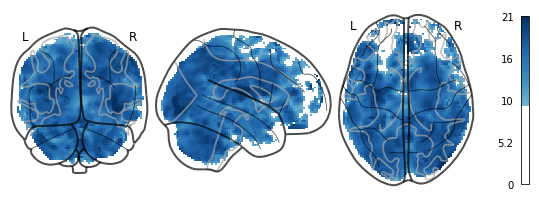

In [44]:
plotting.plot_glass_brain("weighted_results_win_gt_loss.nii", threshold=10, cmap="RdBu", colorbar=True)

/tmp/ipykernel_253044/619928253.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_253044/619928253.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_253044/619928253.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_253044/619928253.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


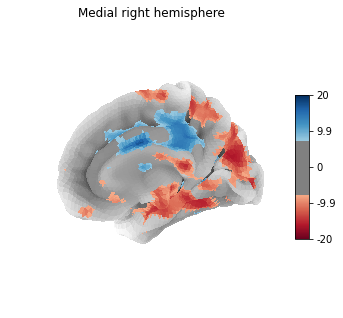

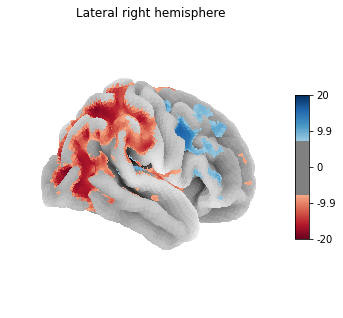

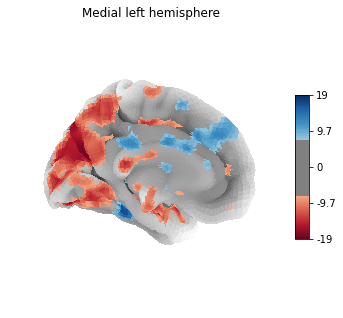

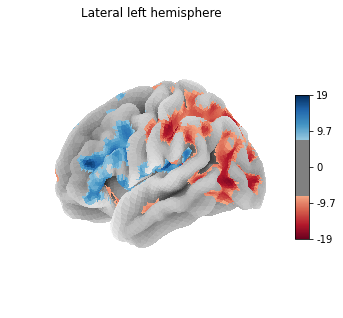

In [74]:
from nilearn import datasets
from nilearn import surface
from nilearn import image

stat_img=image.load_img("weighted_results_win_gt_loss.nii")

fsaverage = datasets.fetch_surf_fsaverage()
texture_right = surface.vol_to_surf(stat_img, fsaverage.pial_right)
texture_left = surface.vol_to_surf(stat_img, fsaverage.pial_left)

fig = plotting.plot_surf_stat_map(
    fsaverage.pial_right, texture_right, hemi='left',
    title='Medial right hemisphere', colorbar=True,
    threshold=7.5, bg_map=fsaverage.sulc_right, cmap="RdBu", 
)
fig.show()
plt.savefig("cher_medialRH.png")

fig = plotting.plot_surf_stat_map(
    fsaverage.pial_right, texture_right, hemi='right',
    title='Lateral right hemisphere', colorbar=True,
    threshold=7.5, bg_map=fsaverage.sulc_right, cmap="RdBu", 
)
fig.show()
plt.savefig("cher_lateralRH.png")

fig = plotting.plot_surf_stat_map(
    fsaverage.pial_left, texture_left, hemi='right',
    title='Medial left hemisphere', colorbar=True,
    threshold=7.5, bg_map=fsaverage.sulc_left, cmap="RdBu", 
)
fig.show()
plt.savefig("cher_medialLH.png")

fig = plotting.plot_surf_stat_map(
    fsaverage.pial_left, texture_left, hemi='left',
    title='Lateral left hemisphere', colorbar=True,
    threshold=7.5, bg_map=fsaverage.sulc_left, cmap="RdBu", 
)
fig.show()
plt.savefig("cher_lateralLH.png")